In [16]:
# Dataset 1 : Wines

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt

# Feature selection
from sklearn.random_projection import GaussianRandomProjection
# preprocessing
from sklearn.preprocessing import MinMaxScaler
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

#dataset
a = io.open('wine-quality-white-and-red.csv', encoding='latin-1')
df = pd.read_csv(a)
#df = df.take([10*i for i in range(649)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['type'])

#output
y = df['type']

print(df.shape)

(6497, 13)


In [21]:
# Import the class
from sklearn.preprocessing import StandardScaler

# Create the object 
scaler = StandardScaler()
# Calculate the mean and the standard deviation
scaler.fit(X)
# Transform the values
X_scaled = scaler.transform(X)

In [18]:
for i in range(2,13):
    grp = GaussianRandomProjection(n_components = i, random_state = 42)
    X_grp = grp.fit_transform(X_scaled)
    print(X_grp.shape)

(6497, 2)
(6497, 3)
(6497, 4)
(6497, 5)
(6497, 6)
(6497, 7)
(6497, 8)
(6497, 9)
(6497, 10)
(6497, 11)
(6497, 12)


In [29]:
grp = GaussianRandomProjection(n_components = 12,random_state = 42)
X_grp = grp.fit_transform(X_scaled)
print(X_grp.shape)

(6497, 12)


In [44]:
# New dataframe

df_new = pd.DataFrame(X_grp, columns =['PC1','PC2','PC3','PC4','PC5'
                                         ,'PC6','PC7','PC8','PC9','PC10','PC11','PC12'] )
df_new = df_new.drop(columns=['PC11'])
df_new = df_new.drop(columns=['PC12'])

df_new['type'] = df.type
df_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,type
0,2.403616,-1.827709,0.782508,1.009643,1.199540,-0.410231,-1.293840,1.551798,-1.393948,0.396230,1
1,-0.305335,0.271194,-0.296587,-0.076219,-0.073981,-0.031166,-0.665567,-0.060796,-0.326768,-0.994819,1
2,0.162023,0.042437,-0.068120,0.137948,0.240936,-0.220487,-0.876519,0.072286,-0.176972,-0.169899,1
3,0.847007,-0.255810,-0.022339,0.827631,1.033854,0.462344,-0.729751,0.510990,-0.834900,0.873888,1
4,0.847007,-0.255810,-0.022339,0.827631,1.033854,0.462344,-0.729751,0.510990,-0.834900,0.873888,1


In [48]:
# save the data
df_new.to_csv('wine_quality_grp.csv', index=False)
df_new.head()
df_new.shape

(6497, 11)

In [ ]:
# cut

(6497, 12)
(6497, 12)
(6497, 12)
(6497, 12)
(6497, 12)
(6497, 12)
(6497, 12)
(6497, 12)
(6497, 12)
(6497, 12)
(6497, 12)
(6497, 12)
time for running the algorithm = 0.05597417100216262 s


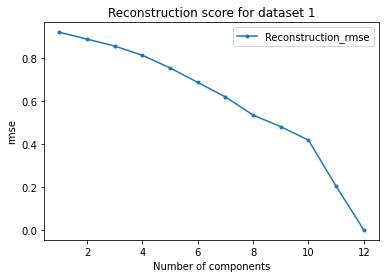

In [39]:
# Plot the reconstruction score

#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

Reconstruction_rmse = []

time1 = time.perf_counter()

#calculate RMSE
for i in range(1,13):
    grp = GaussianRandomProjection(n_components = i,random_state = 42)
    X_grp = grp.fit_transform(X_scaled)
    X_back = grp.inverse_transform(X_grp)
    print(X_back.shape)
    Reconstruction_rmse.append(sqrt(mean_squared_error(X_back,X_scaled)))
    
time2 = time.perf_counter()
timeA = time2 - time1
print('time for running the algorithm =',timeA,'s')
    
number_of_clusters = [i for i in range(1,13)]
fig, ax = plt.subplots()
ax.set_title('Reconstruction score for dataset 1')
ax.set_xlabel('Number of components')
ax.set_ylabel('rmse')
ax.plot(number_of_clusters, Reconstruction_rmse, marker=".", label="Reconstruction_rmse")
ax.legend()
plt.show()